## Tools for network analysis

</br>

### NetworkX 

Python based, 


</br>
### graph-tool
<img style="float: right;" src="img/graph-tool-logo.png">

In [1]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as pl
import lib.directed_watts_strogatz as dws

import numpy as np

import graph_tool.all as gt

from lib.nx2gt import nx2gt

In [22]:
from IPython.core.display import HTML
HTML("""
<style>
.column {
  float: left;
  width: 33.33%;
  padding: 5px;
}

/* Clear floats after image containers */
.row::after {
  content: "";
  clear: both;
  display: table;
}
</style>
""")

In [2]:

def make_graphs(N=50,p=0.2):
    g_edr = nx.gnp_random_graph(N,p, directed=True)
    g_smw = nx.from_numpy_array(dws.watts_strogatz(N, p, 0.1, directed=True), 
                                create_using=nx.DiGraph())
    #g_scf = nx.scale_free_graph(N)
    
    x = gt.price_network(N, N*p)     
    x.save('main.gml')
    g_scf=nx.read_gml('main.gml', label='id')
    
    return (g_edr, g_smw, g_scf)

def make_graphs_gt(N=50,p=0.2):
    graphs = make_graphs(N)
    gt_s = []
    for g in graphs:
        gt_s.append(nx2gt(g))
        
    gt_s[-1] = gt.price_network(N, N*p) 
    
    gt_s[-1].save('main.gml')
    
    return gt_s

def shuffle_nodes(g):
    mapping = dict()
    N = g.number_of_nodes()
    xx=np.arange(N)
    np.random.shuffle(xx)
    for i in range(N):
        mapping={**mapping, **{i:xx[i]+N}}
    h = nx.relabel_nodes(g, mapping, copy=False)
    return h

## Analyzing networks

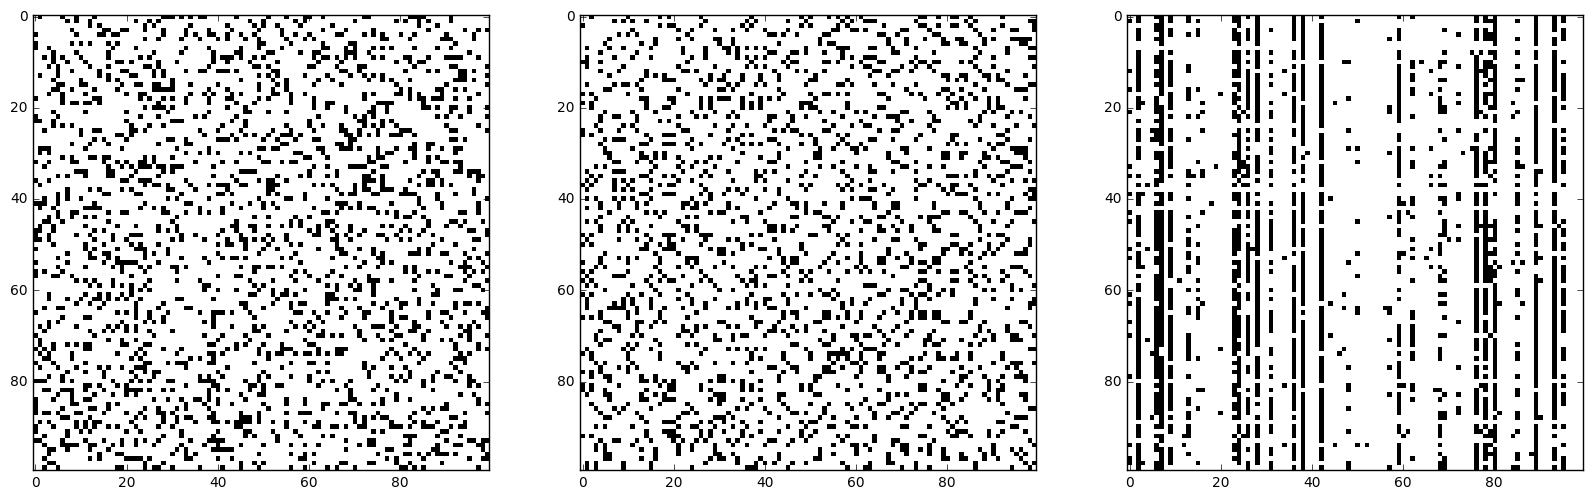

In [4]:
nets = make_graphs(N=100) 
fig, (axs) = pl.subplots(nrows=1, ncols=3, figsize=(20, 10));
for g,ax in zip(nets,axs):
    g = shuffle_nodes(g)
    A=nx.to_numpy_matrix(g)
    ax.imshow(A, aspect='equal', cmap='Greys',  interpolation='nearest')

## Analyzing networks

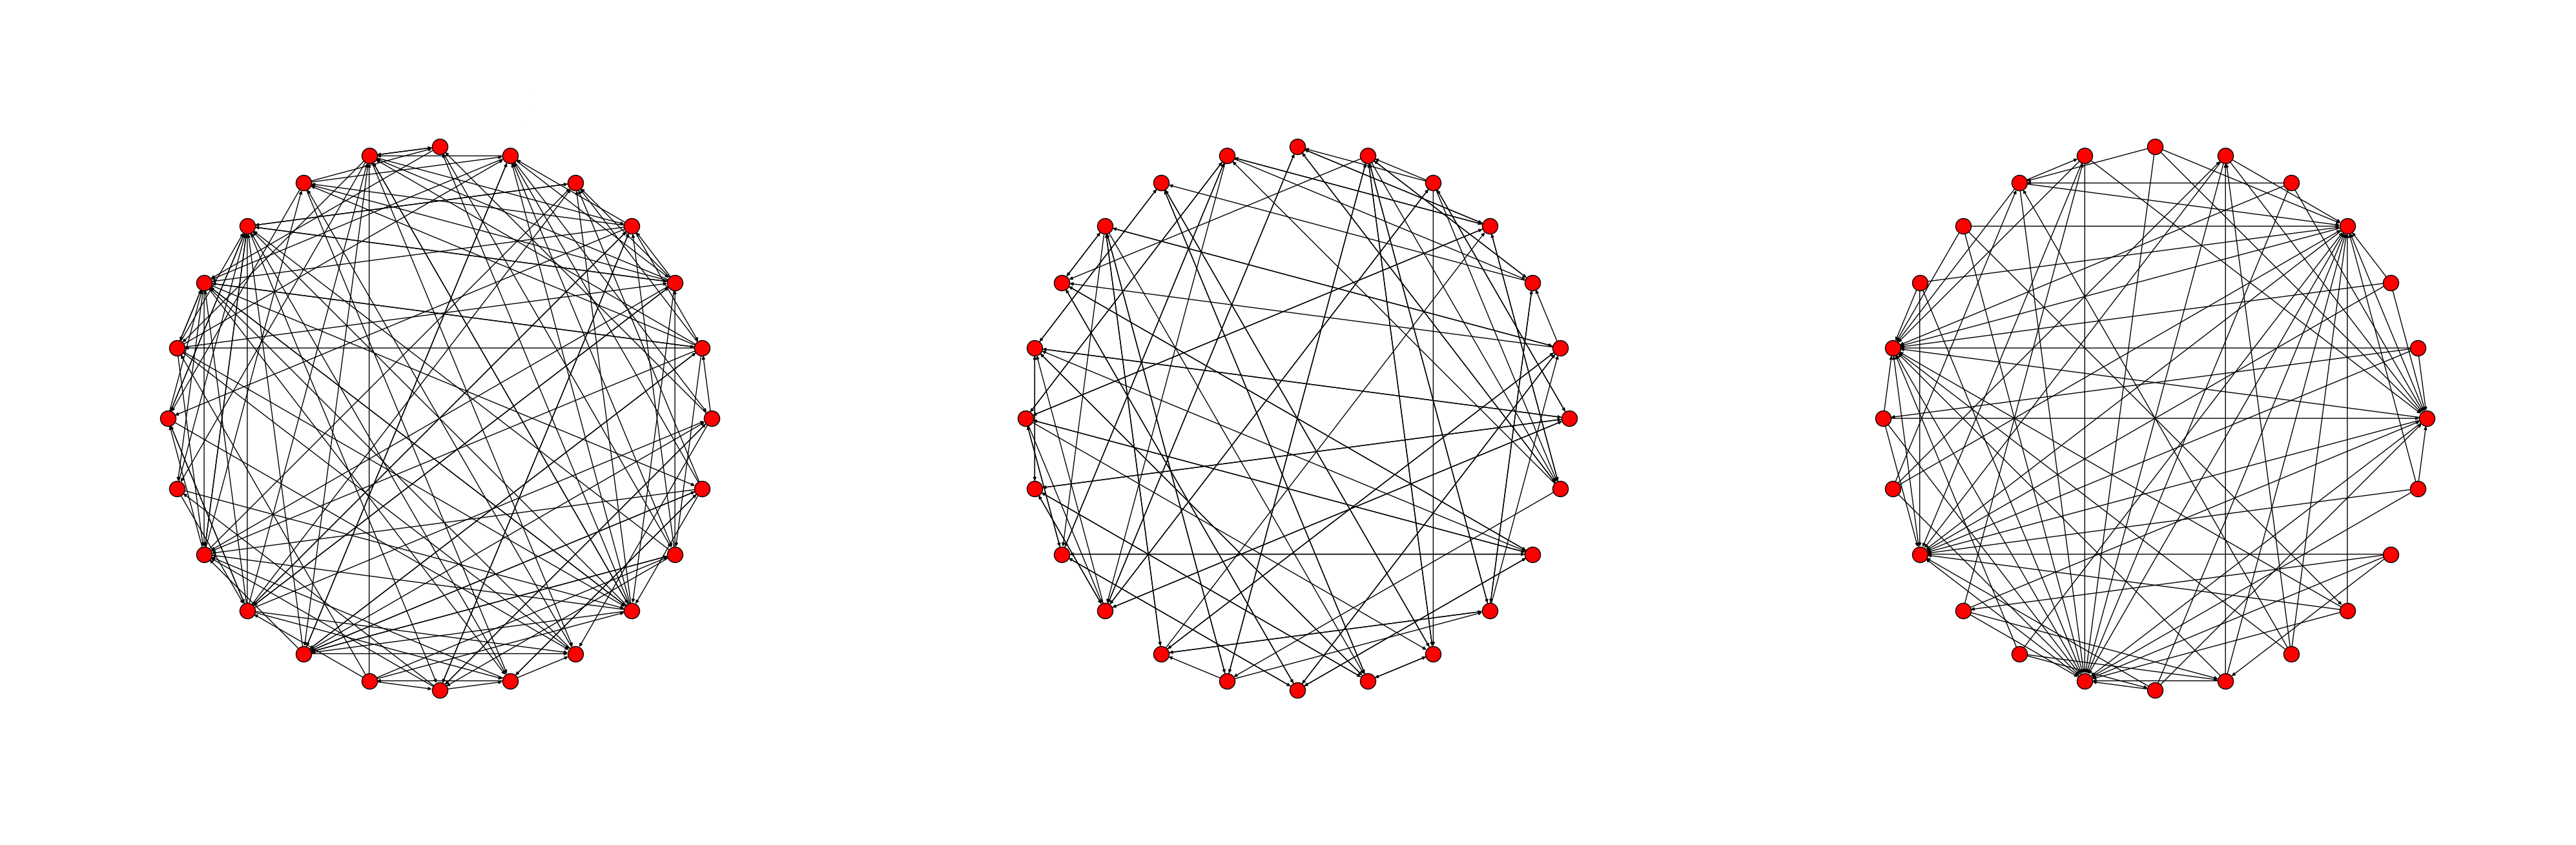

In [5]:
nets = make_graphs(N=24) 
fig, (axs) = pl.subplots(nrows=1, ncols=3, figsize=(40, 20));
for g,ax in zip(nets,axs):
    g=shuffle_nodes(g)
    ax.set_aspect('equal')
    nx.draw_circular(g, ax=ax)
pl.tight_layout()

## Analyzing networks

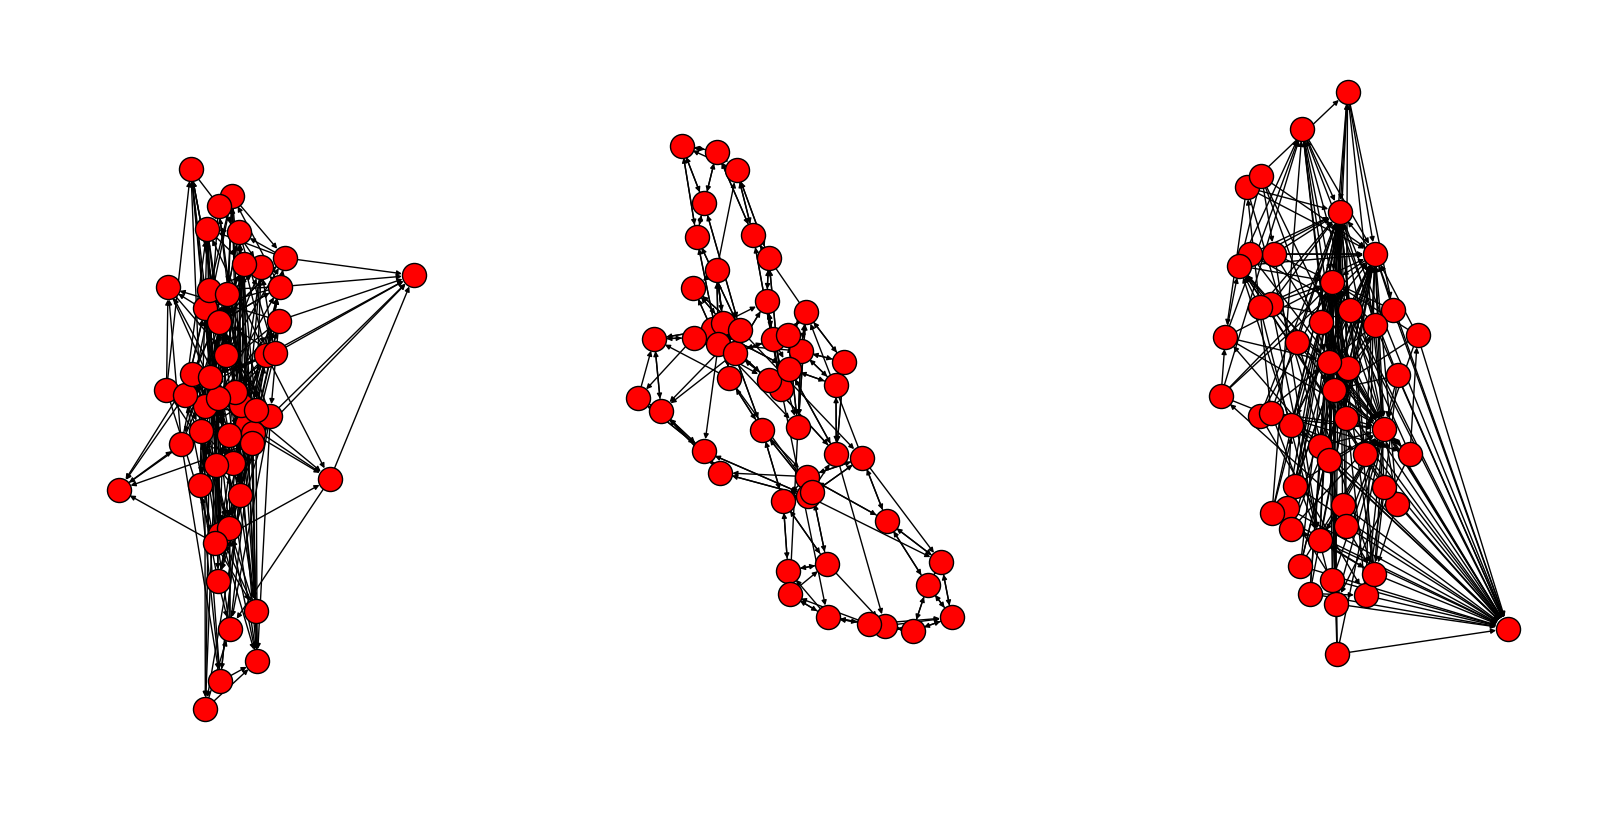

In [6]:
nets = make_graphs(p=0.1) 
fig, (axs) = pl.subplots(nrows=1, ncols=3, figsize=(20, 10));
for g,ax in zip(nets,axs):
    g=shuffle_nodes(g)
    nx.draw(g, ax=ax)

## Network measures

 - <font color=red>global</font> measures pertaining the complete graph
 
 - <font color=red>local</font> measures for a single node (often look at distributions of local node measures or averages)
 
 - <font color=red>regional</font>

## Connection density

<br>

$$ \text{connection density} = \frac{\text{realized connections}}{\text{possible connections}} $$

<br>

In [33]:
nets = make_graphs(N=1000) 
for g in nets:
    print("N:", nx.number_of_nodes(g), "\t", "density:", nx.density(g))

N: 1000 	 density: 0.19946446446446447
N: 1000 	 density: 0.20014914914914914
N: 1000 	 density: 0.18008008008008008


## Connection density in neural circuits

<br>

#### Local cortical circuits

0.05-0.25 -- Song et al. (2005), Lefort et al. (2009), Perin et al. (2011)



## Connection density in neural circuits

</br>

<img style="float: center;width: 70%;" src="img/Lefort2009_Fig1DEF.png">

</br>

<div style="float:right;color:gray;">
Lefort et al. (2009)
</div>

</br>

## Connection density in neural circuits

</br>

<img style="float: center;width: 90%;" src="img/Lefort2009_Tab2.png">

</br>

<div style="float:right;color:gray;">
Lefort et al. (2009)
</div>

</br>

# Connection density in neural circuits

<br>
## Local cortical circuits

0.05-0.25 -- Song et al. (2005), Lefort et al. (2009), Perin et al. (2011)

<br>
## Brain area networks

<br>
### Mouse
 - 0.35-0.53 -- Oh et al. (2014), computational model
 - 0.73 -- Ypma and Bullmore (2014), re-analysis
 - 0.97 -- Gămănuţ et al. (2018)

### Macaque
 - 0.66 --- Markov et al. (2014)

## In- and out-degree distributions   - <font color=red>local measure</font>



In [9]:
def simple_graph():

    G = nx.DiGraph()

    G.add_edges_from(
        [('A', 'B'), ('A', 'C'), ('H', 'A'), ('G', 'A'), ('F', 'A')])

    val_map = {'A': 1.0,
               'D': 0.5714285714285714,
               'H': 0.0}

    values = [val_map.get(node, 0.25) for node in G.nodes()]

    pl.axis('off')
    nx.draw_networkx(G, node_color = 'white')

    return G

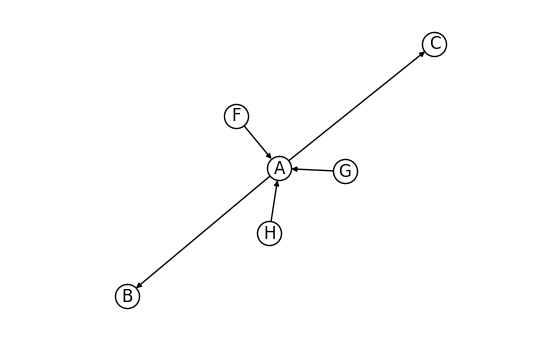

In [12]:
g = simple_graph()

In [15]:
g.in_degree('A'), g.out_degree('A')

(3, 2)

## In- and out-degree distributions  - <font color=red>local measure</font>


**In-degree** of a node is the number of <font color=red>incoming</font> connections

**Out-degree** of a node is the number of <font color=red>outgoing</font> connections

<br>

 In undirected graphs
 
 $$ \text{In-degree} = \text{out-degree}$$

<br>

Consistency: Equal number of "heads" and "tails" across graph matches

$$ \sum_{v \in V} \deg^-(v) = \sum_{v \in V} \deg^+(v) $$

## In-degree distributions

In [13]:
pl.style.use('ggplot')

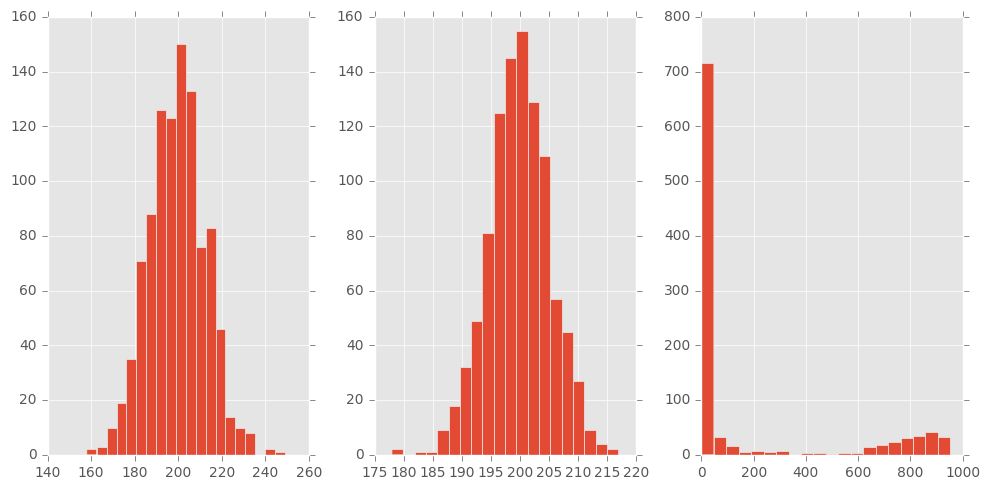

In [14]:
nets = make_graphs(N=1000) 
fig, (axs) = pl.subplots(nrows=1, ncols=3, figsize=(10, 5));
for g,ax in zip(nets,axs):
    ax.hist([x[1] for x in g.in_degree()], bins=20)
pl.tight_layout()

## Out-degree distributions

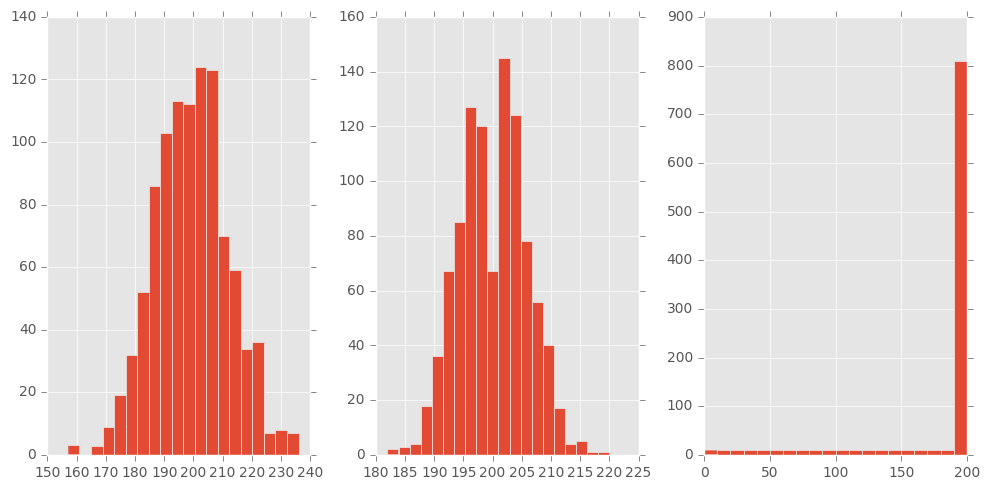

In [15]:
fig, (axs) = pl.subplots(nrows=1, ncols=3, figsize=(10, 5));
for g,ax in zip(nets,axs):
    ax.hist([x[1] for x in g.out_degree()], bins=20)
pl.tight_layout()

# Degree distributions in the brain

<br>
## Theoretical studies
<br>
### Roxin (2011) 
Effect of broadening in-degree and out-degree distributions in recurrent networks

<br>
### Martens et al. (2017)

Anti-correlated degree distributions increased network stability and had highest performance in detecting stimuli

## Degree distributions in the brain - Martens et al. (2017)

<br>

 <div class="row">
  <div class="column" style="width:49%">
    <img src="img/Martens2017_Fig2A.png" alt="Fjords" style="width:100%">
  </div>
  <div class="column" style="width:49%">
    <img src="img/Martens2017_Fig6B.png" alt="Forest" style="width:100%">
  </div>
</div> 

<br>

<div style="float:right;color:gray;">
Martens et al. (2017)
</div>

<br>

## Clustering


(0.361058854433666, 0.0001889930191501957)
(0.6516422332814018, 0.0005428196471297924)
(0.4863462979749094, 0.00641591549221362)


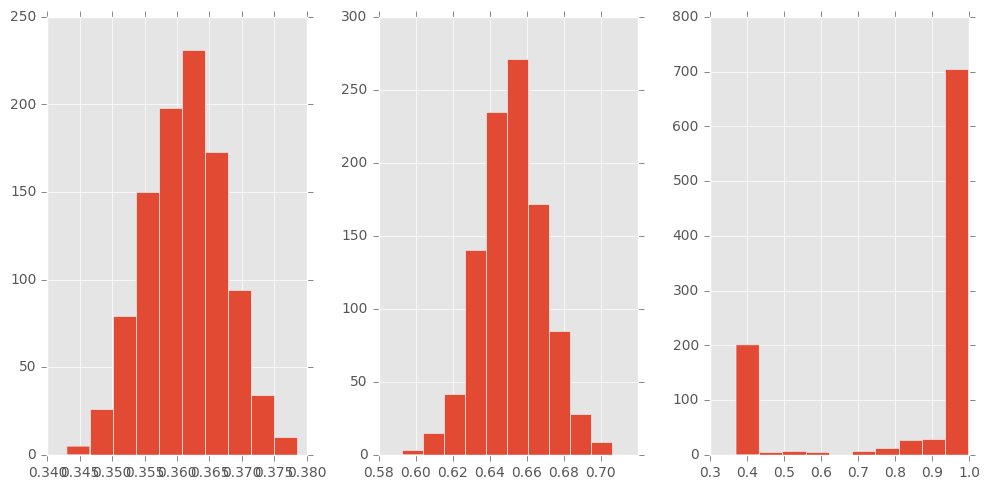

In [16]:
nets = make_graphs_gt(N=1000) 
fig, (axs) = pl.subplots(nrows=1, ncols=3, figsize=(10, 5));
for g,ax in zip(nets,axs):
    print(gt.global_clustering(g))
    ax.hist(list(gt.local_clustering(g)))
pl.tight_layout()

## Shortest Paths

In [9]:
def simple_graph():

    G = nx.DiGraph()

    G.add_edges_from(
        [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
         ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

    val_map = {'A': 1.0,
               'D': 0.5714285714285714,
               'H': 0.0}

    values = [val_map.get(node, 0.25) for node in G.nodes()]

    pl.axis('off')
    nx.draw_networkx(G, node_color = 'white')

    return G

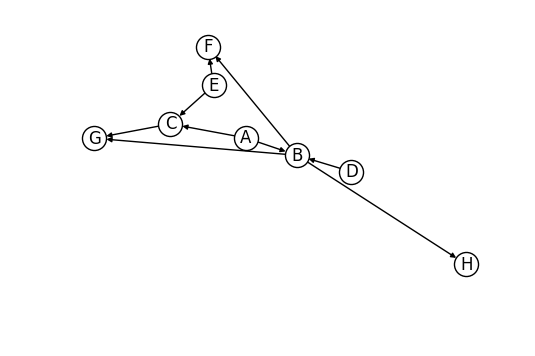

In [10]:
G = simple_graph()

In [11]:
nx.shortest_path(G, 'A', 'G')

['A', 'C', 'G']

In [12]:
#nx.shortest_path(G, 'F', 'G')

## Shortest Paths

In [13]:
nets = make_graphs(N=10)#00) 
#fig, (axs) = pl.subplots(nrows=1, ncols=3, figsize=(10, 5));
for g,ax in zip(nets,axs):
    print(nx.average_shortest_path_length(g))
    #print([list(nx.shortest_path_length(g)))

NetworkXError: Graph is not weakly connected.

## References

1.Lefort, S., Tomm, C., Floyd Sarria, J.-C. & Petersen, C. C. H. The Excitatory Neuronal Network of the C2 Barrel Column in Mouse Primary Somatosensory Cortex. Neuron 61, 301–316 (2009).

1.Lefort, S., Tomm, C., Floyd Sarria, J.-C. & Petersen, C. C. H. The Excitatory Neuronal Network of the C2 Barrel Column in Mouse Primary Somatosensory Cortex. Neuron 61, 301–316 (2009).



In [ ]:
# overflow

nets = make_graphs_gt(N=50) 
#pl.switch_backend('cairo')
#fig, (axs) = pl.subplots(nrows=1, ncols=3, figsize=(20, 10));

#for g,ax in zip(nets,axs):

#fig=pl.figure()
#ax=fig.add_subplot(111)
for k in range(3):
    pos=gt.random_layout(nets[-2],0)
    gt.graph_draw(nets[-2],pos=pos)#, mplfig=ax);
    
#fig.savefig('new.png')